##Using new complex plane calculations for radial velocity texture
Scott Collis and Jonathan Helmus



In [102]:
import pyart
from matplotlib import pyplot as plt
import numpy as np
import scipy
%matplotlib inline


In [112]:
radar = pyart.io.read('/data/sample_sapr_data/csapr_july9/sgpcsaprsurI7.00.20150709.111301.raw.cfrad.20150709_102911.531_CSAP_v4450_SUR.nc')

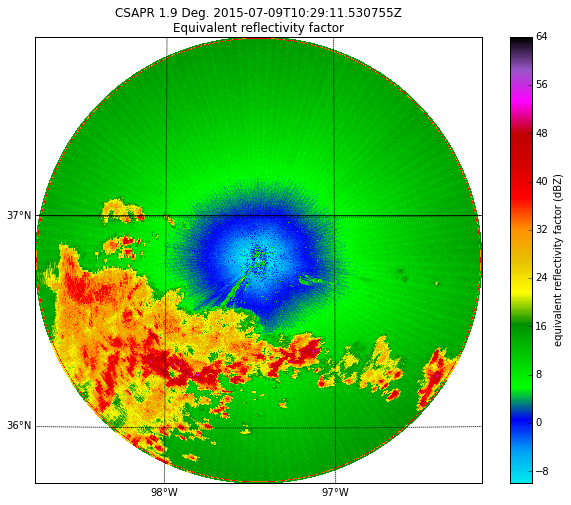

In [3]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize = [10,8])
display.plot_ppi_map('reflectivity', sweep = 2, resolution = 'i',
                    vmin = -10, vmax = 64, mask_outside = False,
                    cmap = pyart.graph.cm.NWSRef)


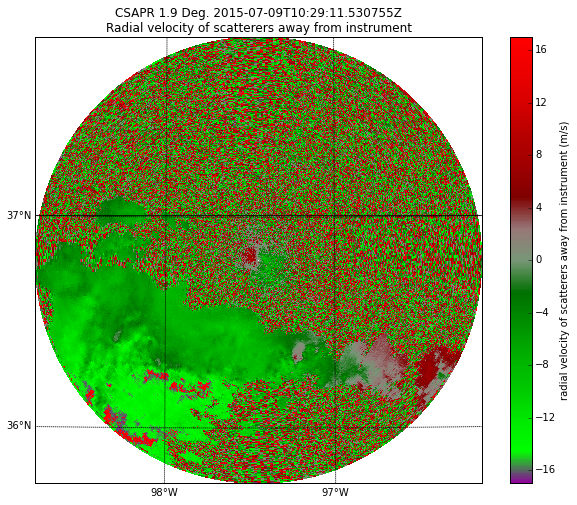

In [101]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize = [10,8])
display.plot_ppi_map('velocity', sweep = 2, resolution = 'i',
                    vmin = -17, vmax = 17, mask_outside = False,
                    cmap = pyart.graph.cm.NWSVel)


In [116]:
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]
scaled_vels = np.pi*radar.fields['velocity']['data']/nyq
data = scipy.ndimage.filters.generic_filter(scaled_vels, pyart.util.angular_std, size = 3)

In [120]:
texture_field = pyart.config.get_metadata('velocity')
texture_field['data'] = data
radar.add_field('velocity_texture', texture_field, replace_existing = True)

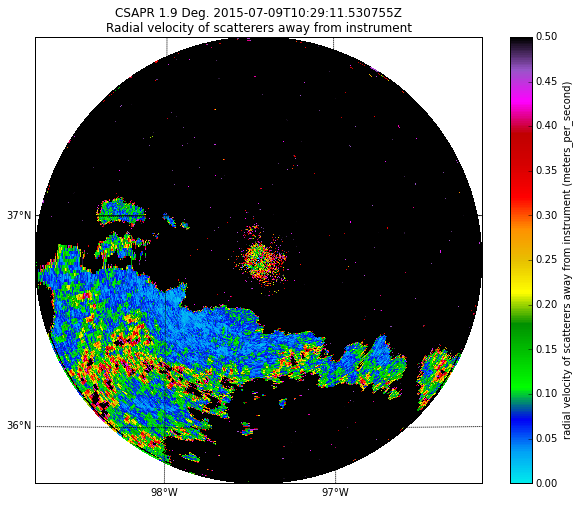

In [121]:
display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize = [10,8])
display.plot_ppi_map('velocity_texture', sweep = 2, resolution = 'i',
                    mask_outside = False,
                    cmap = pyart.graph.cm.NWSRef,
                    vmin = 0, vmax = 0.5)
